In [151]:
from keras.layers import LSTM
from __future__ import print_function
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Dense, Activation

import matplotlib.pyplot as plt
from sklearn import preprocessing
import math, time
from sklearn.metrics import mean_squared_error

Planteamiento del problema, apartir de la adquicicion de datos geoelectricos durante campañas de exploracion, se suele tener complicaciones topografias, climaticas, sociales, etc. que pueden truncar la adquicicion de datos, ocacionando que la falta de estos tengan un efecto en el modelado de anomalias y procesado de los lotes de datos.
acontinuacion se plantea una solucion apartir de tecnicas de Deep Learning para solventar la falta de datos, mediante la tecnica Redes Neuronales Recurrentes (RNN) mediante  Long Short-Term Memory (LSTM) ya que esta red neuronal logra aprender de dependencias temporales en series de tiempo.

Duda: cuel es la mejor manera de determinar lo pesos de inicializacion de la red LSTM



Sherstinsky, A. (2020). Fundamentals of recurrent neural network (RNN) and long short-term memory (LSTM) network. Physica D: Nonlinear Phenomena, 404, 132306. url: https://arxiv.org/pdf/1808.03314

Ismail Fawaz, H., Forestier, G., Weber, J., Idoumghar, L., & Muller, P. A. (2019). Deep learning for time series classification: a review. Data mining and knowledge discovery, 33(4), 917-963., url: https://arxiv.org/pdf/1809.04356.pdf


In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#LEER TABLA DE DATOS
RHA = pd.read_csv('C:/Users/juanj/Documents/GitHub/Aprendizaje-Profundo/datos.csv', header=0,sep=",")
RHA.head()

,AB/2,Rha
0,2,209
1,3,138
2,5,86
3,5,44
4,8,75


In [153]:
len(RHA)

80

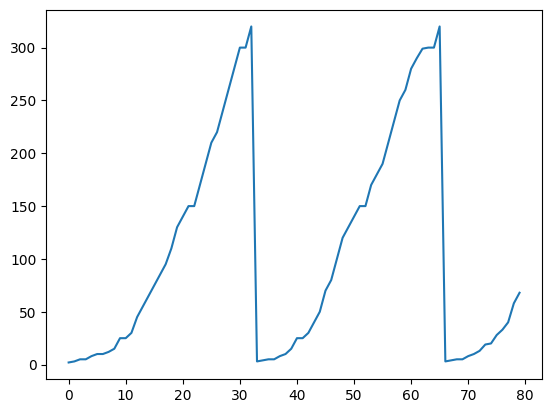

In [170]:
plt.plot(RHA['AB/2'])
plt.show()

In [155]:
data = RHA.to_numpy()

print(data[0])

[  2 209]


In [156]:
import numpy as np
from scipy.interpolate import interp1d

# Separar datos en x e y
x = data[:,0]
y = data[:,1]

# Crear función de interpolación
f = interp1d(x,y)

# Generar nuevos valores de x
new_x = np.linspace(np.min(x),np.max(x),5000)

# Calcular valores interpolados de y
new_y = f(new_x)

# Combinar nuevos valores de x e y
new_data = np.column_stack((new_x,new_y))

print(new_data)


[[2.00000000e+00 2.09000000e+02]
 [2.06361272e+00 2.04483497e+02]
 [2.12722545e+00 1.99966993e+02]
 ...
 [3.19872775e+02 7.11230570e+03]
 [3.19936387e+02 7.13465285e+03]
 [3.20000000e+02 7.15700000e+03]]


In [157]:
len(new_data)


5000

In [158]:
df = pd.DataFrame(new_data)
df.head()

,0,1
0,2.000000,209.000000
1,2.063613,204.483497
2,2.127225,199.966993
3,2.190838,195.450490
4,2.254451,190.933987


In [163]:
df.columns

Index([0, 1], dtype='int64')

In [164]:
df.rename(columns={0:'AB',1:'ra'},inplace=True)

In [167]:
df.head()

,AB,ra
0,2.000000,209.000000
1,2.063613,204.483497
2,2.127225,199.966993
3,2.190838,195.450490
4,2.254451,190.933987


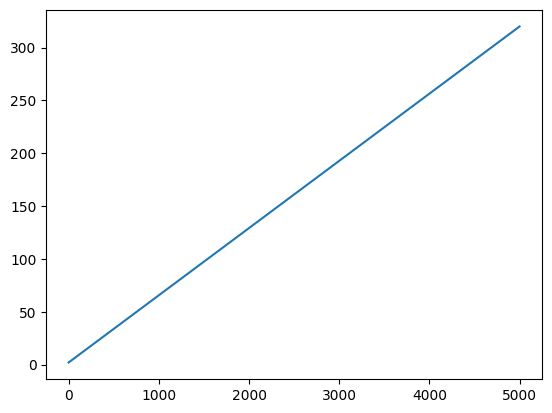

In [169]:
plt.plot(df['AB'])
plt.show()

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
RHAM = min_max_scaler.fit_transform(new_data['new_x'].values.reshape(-1, 1))